<a href="https://colab.research.google.com/github/snvssk/data298A/blob/saidev/Resnet50_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers.core import Dense,Flatten
#from tensorflow.keras import layers,Dense,Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [6]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

data_dir = pathlib.Path(data_dir)


228827136/228813984 [==============================] - 2s 0us/step


In [11]:
print(data_dir)

/root/.keras/datasets/flower_photos


In [24]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [25]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [28]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


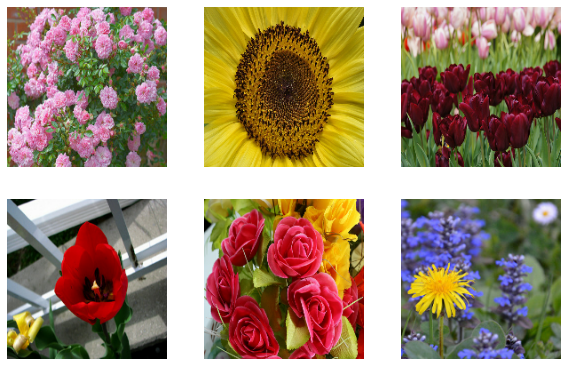

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  #print(labels)
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    #print(labels[0:1])
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

In [33]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [34]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [19]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [35]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])




In [36]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
92/92 [==============================] - 359s 4s/step - loss: 0.8339 - accuracy: 0.7527 - val_loss: 0.3912 - val_accuracy: 0.8501
Epoch 2/10
92/92 [==============================] - 364s 4s/step - loss: 0.2966 - accuracy: 0.8873 - val_loss: 0.3619 - val_accuracy: 0.8597
Epoch 3/10
92/92 [==============================] - 353s 4s/step - loss: 0.1898 - accuracy: 0.9319 - val_loss: 0.3490 - val_accuracy: 0.8624
Epoch 4/10
92/92 [==============================] - 352s 4s/step - loss: 0.1081 - accuracy: 0.9680 - val_loss: 0.3322 - val_accuracy: 0.8760
Epoch 5/10
92/92 [==============================] - 353s 4s/step - loss: 0.0768 - accuracy: 0.9789 - val_loss: 0.3453 - val_accuracy: 0.8910
Epoch 6/10
92/92 [==============================] - 352s 4s/step - loss: 0.0490 - accuracy: 0.9884 - val_loss: 0.3697 - val_accuracy: 0.8801
Epoch 7/10
92/92 [==============================] - 352s 4s/step - loss: 0.0207 - accuracy: 0.9983 - val_loss: 0.3723 - val_accuracy: 0.8869
Epoch 8/10
92

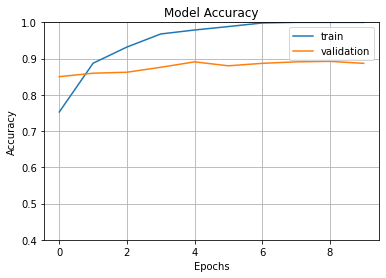

In [41]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


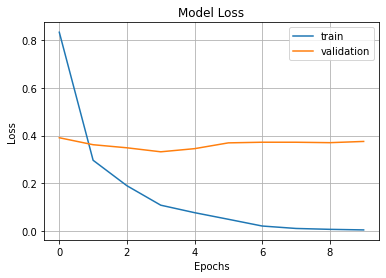

In [42]:
#fig2 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [47]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [48]:
import cv2
def predictor(predict_img):
  image=cv2.imread(str(predict_img))
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  PIL.Image.open(str(predict_img))
  pred=resnet_model.predict(image)
  output_class=class_names[np.argmax(pred)]
  print("The predicted class is", output_class) 
  return True
  

The predicted class is roses


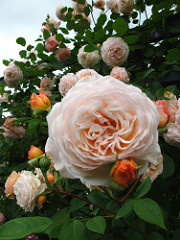

In [50]:
roses = list(data_dir.glob('roses/*'))
predictor(roses[0])
PIL.Image.open(str(roses[0]))



The predicted class is sunflowers


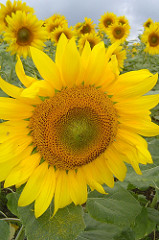

In [53]:
sunflowers = list(data_dir.glob('sunflowers/*'))
predictor(sunflowers[1])
PIL.Image.open(str(sunflowers[1]))

The predicted class is tulips


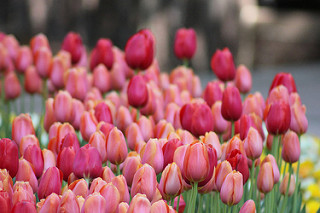

In [54]:
tulips = list(data_dir.glob('tulips/*'))
predictor( tulips[1])
PIL.Image.open(str(tulips[1]))

The predicted class is tulips


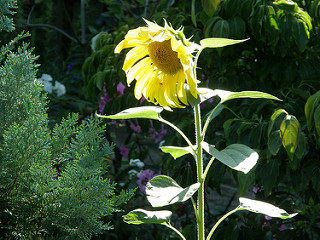

In [55]:
predictor(sunflowers[0])
PIL.Image.open(str(sunflowers[0]))